###imports

In [0]:
import numpy as np
import torch

### sigmoid function

In [0]:
def sigmoid(x):
  return(1/1+np.exp(-x))

### create random data

In [0]:
torch.manual_seed(42)

features = torch.randn((1,5))
wts = torch.randn_like(features)
bias = torch.randn((1,1))


In [0]:
y = sigmoid(torch.sum(features*wts)+bias)
y

tensor([[1.6616]])

In [0]:
y = sigmoid(torch.mm(features,wts.view(5,1))+bias)  # view will convert to desired output
y

tensor([[1.6616]])

In [0]:
# creating 3 inputs 1 hidden layer and 1 output unit

# Features are 3 random normal variables
features = torch.randn((1, 3))

# Define the size of each layer in our network
n_input = features.shape[1]     # Number of input units, must match number of input features
n_hidden = 2                    # Number of hidden units 
n_output = 1                    # Number of output units

# Weights for inputs to hidden layer
W1 = torch.randn(n_input, n_hidden)
# Weights for hidden layer to output layer
W2 = torch.randn(n_hidden, n_output)

# and bias terms for hidden and output layers
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

In [0]:
h = sigmoid(torch.mm(features,W1)+B1)
output = sigmoid(torch.mm(h,W2)+B2)
print(output)

tensor([[1.0742]])


# MNIST

In [0]:
import torch 
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from torchvision import datasets,transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))  # mean and std deviation
                               ])
trainset = datasets.MNIST('~/.pytorch/MNIST_data/',download = True,train = True,transform = transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size = 64,shuffle = True)

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [0]:
# since we need probabilities of each class we use softmax with 10 outputs

def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x),dim =1).view(-1,1)  # dim = 1 sum across columns


'''
if torch.exp(x) will have 64 X 10 dimension ; torch.sum(torch.exp(x),dim =1) will give tensor of 64 elements dimension will be(64,) we need (64,1)
normally torch.exp(x)/torch.sum(torch.exp(x),dim =1) will try to divide torch.exp with all 64 elements of torch.sum()
so we do view(-1,1) it will make 64 rows for sum with each row having 1 value row so each value in torch.exp() matches with sum


'''

'\ntorch.exp(x) will have 64 X 10 dimension ; torch.sum(torch.exp(x),dim =1) will give tensor of 64 elements\nnormally torch.exp(x)/torch.sum(torch.exp(x),dim =1) will try to divide torch.exp with all 64 elements of torch.sum()\nso we do view(-1,1) it will make 64 rows for sum with each row having 1 value row so each value in torch.exp() matches with sum\n\n\n'

In [0]:
#flatten input images
inputs = images.view(images.shape[0],-1) # can also replace -1 with (784) x.shape[0] gives us batch size

# create inputs 784
w1 = torch.randn(784,256)  # 256 hidden layers
b1 = torch.randn(256)

w2 = torch.randn(256,10) # 10 output units
b2 = torch.randn(10)

h = softmax(torch.mm(inputs,w1) + b1)
out = torch.mm(h,w2)+b2


## inbuilt method for nn classifying  fashion mnist


In [0]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [0]:
# need helper script link down below
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

AttributeError: ignored

In [0]:
from torch import nn,optim
import torch.nn.functional as F # functional will make our work easy

## classifier defined

In [0]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784,256) # creating a single hidden layer
    self.fc2 = nn.Linear(256,128)
    self.fc3 = nn.Linear(128,64)
    self.fc4 = nn.Linear(64,10)
  
  def forward(self,x): #forward pass
    #print(x.shape) torch.Size([64, 1, 28, 28])
    x = x.view(x.shape[0],-1)     # flatten input 
    #print(x.shape)  torch.Size([64, 784])
    x = F.relu(self.fc1(x))       # apply activation function to layer
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.log_softmax(self.fc4(x),dim =1)  # apply log softmax for output layer where 
    
    return x

### Training the model

In [0]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.003)


In [0]:
epochs = 5

for epoch in range(epochs):
  running_loss = 0
  for images,labels in trainloader:
    log_ps = model(images)
    loss = criterion(log_ps,labels)
    
    optimizer.zero_grad()
    loss.backward()    # backward pass 
    optimizer.step()  # to update the weights
    
    running_loss += loss.item()
  
  else:  
    print(f"Training loss: {running_loss/len(trainloader)}")
  


In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

In [0]:
import matplotlib.pyplot as plt

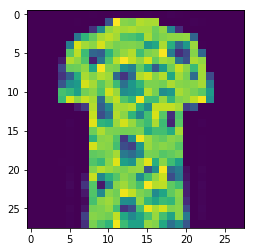

In [0]:
plt.imshow(img.reshape(28,28))

In [0]:
output = torch.exp(model(img))
output

tensor([[8.8480e-01, 1.0488e-05, 1.3338e-03, 1.8327e-03, 1.8539e-05, 7.7281e-08,
         1.1197e-01, 1.1084e-10, 3.1550e-05, 1.9243e-10]],
       grad_fn=<ExpBackward>)

In [0]:
output.data

tensor([[8.8480e-01, 1.0488e-05, 1.3338e-03, 1.8327e-03, 1.8539e-05, 7.7281e-08,
         1.1197e-01, 1.1084e-10, 3.1550e-05, 1.9243e-10]])

In [0]:
output.data.numpy().squeeze()

array([8.8479960e-01, 1.0488332e-05, 1.3337604e-03, 1.8326698e-03,
       1.8538793e-05, 7.7280809e-08, 1.1197327e-01, 1.1083554e-10,
       3.1550229e-05, 1.9242787e-10], dtype=float32)

In [0]:
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

In [0]:
# code from above
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

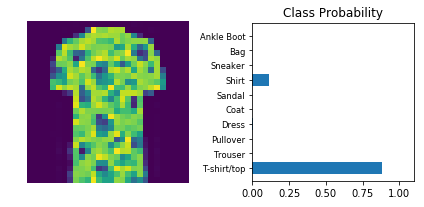

In [0]:
view_classify(img, output, version='Fashion')


In [0]:
print("actual ",label[1])
print("predicted",preds)

actual  tensor(9)
predicted 0


### inference and validation

inference  = prediction

In [0]:
model = Classifier()

#loading test set
images, labels = next(iter(testloader))

# Get the class probabilities
ps = torch.exp(model(images))   # output of the model trained


# Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
print(ps.shape)

torch.Size([64, 10])


In [0]:
#printing top class in the dataset 

top_p, top_class = ps.topk(1,dim =1) #will print top k classes returns top k numbers and corrs classes

print("top 10 values",top_class[:10,:])

top 10 values tensor([[2],
        [2],
        [9],
        [2],
        [2],
        [2],
        [2],
        [9],
        [2],
        [2]])


In [0]:
#comparing output with our real values ie. label with top_class
# but label is 1d tensor of len 64
# top_class is 2d tensor of dim 64,1


equals = top_class == label.view(-1,1)

equals = top_class == label.view(*top_class.shape)

### finding accuracy :
simply do sum of all values / no of all values === mean

here equals = bool but mean works with int+ so convert equals to float

In [0]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy score is : {accuracy.item()*100}%')

#without training our model just random accuracy

Accuracy score is : 14.0625%


# For training set and validation set and adding drop out

##imports

In [0]:
import torch
from torchvision import datasets, transforms

from torch import nn,optim
import torch.nn.functional as F

In [0]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

## classifier class

In [0]:
# avoiding overfitting using dropout

class Classifier2(nn.Module):
  
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 10)
    
    self.dropout = nn.Dropout(p = 0.2)   # added drop out
    
    
    
  def forward(self,x):
    
    # print(x.shape)
    x = x.view(x.shape[0],-1) #flattening x
    # print(x.shape)
    x = self.dropout(F.relu(self.fc1(x)))
    x = self.dropout(F.relu(self.fc2(x)))
    x = self.dropout(F.relu(self.fc3(x)))
    
    # last output will be using softmax for prob outputs
    x = F.log_softmax(self.fc4(x),dim =1)
    
    output = x
    print("********************************",type(output),output,type(x),x)
    return output

during training only we use drop out during inference we use whole network

In [0]:
model = Classifier2()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.003)

epochs = 30
steps = 0

train_losses,test_losses = [],[]

for e in range(epochs):
  running_loss = 0
  for images,labels in trainloader:
    
    optimizer.zero_grad()
    
    log_ps = model(images)
    loss = criterion(log_ps,labels)
    loss.backward() #this is for backward propogation 
    optimizer.step()  # this is for the steps that will be taken backwards
    
    running_loss += loss.item()
    
    
  else :
    test_loss = 0
    accuracy =0
    
    # turn off gradients for validation, saving memory and computation
    
    with torch.no_grad():
      model.eval() #setting model to evaluation mode
      for images,labels in testloader:
        log_ps = model(images)
        test_loss += criterion(log_ps,labels)
        
        ps = torch.exp(log_ps)
        top_p,top_class = ps.topk(1,dim =1)  # finding top n classes in ouput gives top class labels and values
        print(top_p, top_class)
        
        #shape of top_class = 64,1 and label is 1D tensor with shape 64, so we make labels into shape of top_class
        equals = top_class == labels.view(*top_class.shape)
        #equals2 = top_class == labels.view(1,-1)
        
        print(f"top_class shape : {top_class.shape} without * {top_class.shape}")
        print(f"equals value orig : {equals}")
        
        accuracy += torch.mean(equals.type(torch.FloatTensor))  # equals is in boolean convert to float
    
    
    model.train()
    
    train_losses.append(running_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))
    
    print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
          
        
        
        
  

In [0]:
import matplotlib.pyplot as plt

In [0]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [0]:
model.eval()

# saving model

In [0]:
model.save('name',path)

# Loading images

In [0]:
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

#import helper

#keep images in format data/train data/test

data_dir = 'hello/'

train_transforms = transforms.Compose([
                                          transforms.RandomRotation(30),
                                        transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor() ])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor()])


# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)


# DataLoaders take input you provide and returns them back in batches with corresponding labels

In [0]:
# Loading train and testdata one by one as they need iterator 

data_iter = iter(testloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)

# Transfer Learning

In [0]:
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
'''
Most of the pretrained models require the input to be 224x224 images. Also, we'll need to match the normalization 
used when the models were trained. Each color channel was normalized separately, 
the means are [0.485, 0.456, 0.406] and the standard deviations are [0.229, 0.224, 0.225].

'''

### loading images

In [0]:
data_dir = 'Cat_Dog_data'

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)

In [0]:
model = models.densenet121(pretrained=True)
model

## new method of making a model than above

In [1]:
## Use GPU if it's available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False
    
from collections import OrderedDict

classifier = nn.Sequential(OrderedDict([
                            ('fc1',nn.Linear(1024,500)),
                            ('relu',nn.ReLU()),
                            ('fc2', nn.Linear(500, 2)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))
    
model.classifier = classifier 


NameError: ignored

## or can use this method

In [0]:
model = models.densenet121(pretrained=True)

# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False
    
model.classifier = nn.Sequential(nn.Linear(1024, 256),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(256, 2),
                                 nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

# Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.classifier.parameters(), lr=0.003)

model.to(device);

In [0]:
epochs = 1
steps = 0
running_loss = 0
print_every = 5
for epoch in range(epochs):
    for inputs, labels in trainloader:
        steps += 1
        # Move input and label tensors to the default device
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in testloader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    logps = model.forward(inputs)
                    batch_loss = criterion(logps, labels)
                    
                    test_loss += batch_loss.item()
                    
                    # Calculate accuracy
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Test loss: {test_loss/len(testloader):.3f}.. "
                  f"Test accuracy: {accuracy/len(testloader):.3f}")
            running_loss = 0
            model.train()